### Importing the necessary libraries and the util module

In [1]:
import utils
import pandas as pd
import numpy as np

### Reading the dataset

In [2]:
df = utils.read('FODS-A2.csv')

In [3]:
features = list(df.columns)
features.pop(-1)
print(len(features))

26


In [4]:
cur_rms = np.Inf
startdf = pd.DataFrame(df['Appliances'])
taken = [0 for i in range(26)]

In [5]:
rms_test , rms_train = list() , list()
feature_num = list()

### Forward Feature Selection

In [6]:
def forward(cur_data , cur_rms) : 
    if sum(taken) == 26 :
        return cur_data , cur_rms
    id = -1
    cur_tr , cur_ts = 0 , 0
    for i in range(len(df.columns) - 1) : 
        if taken[i] == 0 : 
            new_df = cur_data.copy()
            new_df.insert(0 , features[i] , pd.DataFrame(df[features[i]]))
            rms = utils.regression(new_df , 5000 , 0.00001)
            if(cur_rms > rms[0]) : 
                cur_rms = rms[0]
                cur_ts = cur_rms
                cur_tr = rms[1]
                id = i
    if id == -1 : 
        return cur_data , cur_rms
    taken[id] = 1
    rms_test.append(cur_ts)
    rms_train.append(cur_tr)
    cur_data.insert(0 , features[id] , pd.DataFrame(df[features[id]]))
    feature_num.append(len(cur_data.columns))
    forward(cur_data , cur_rms)

In [7]:
forward(startdf , cur_rms)

In [8]:
row = list()
flist = list()
for i in range(len(rms_train)) :
    train , test = rms_train[i] , rms_test[i]
    features_selected = feature_num[i]
    record = [features_selected - 1 , train , test]
    row.append(record)
    flist.append(features_selected - 1)
table = pd.DataFrame(row , columns=['No of Features selected' , 'Train RMS' , 'Test RMS'])
table

,No of Features selected,Train RMS,Test RMS
0,1,104.017192,98.940186
1,2,103.155676,98.208805
2,3,101.951968,96.583217
3,4,101.449221,96.032960
4,5,100.506894,95.358191
5,6,100.430860,95.138365
6,7,100.383972,94.971267
7,8,99.563636,94.777191
8,9,98.637114,94.475145
9,10,98.500797,94.232301


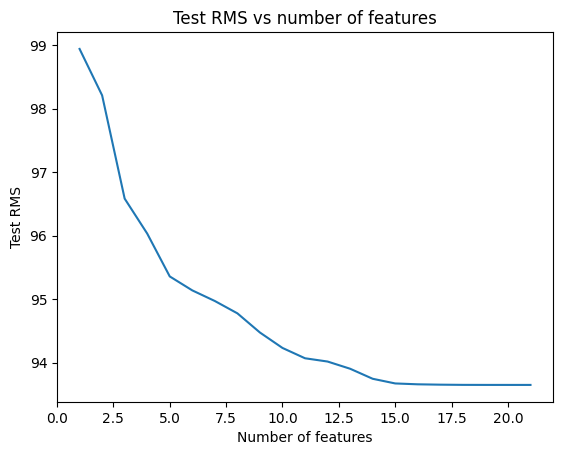

In [9]:
import matplotlib.pyplot as plt
plt.title("Test RMS vs number of features")
plt.xlabel("Number of features")
plt.ylabel("Test RMS")
plt.plot(flist , rms_test)
plt.show()

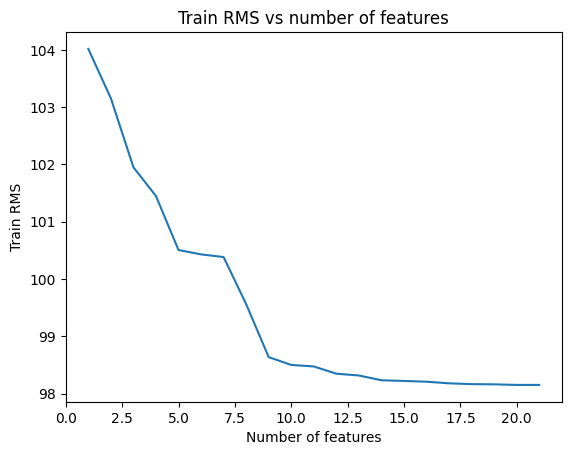

In [10]:
plt.title("Train RMS vs number of features")
plt.xlabel("Number of features")
plt.ylabel("Train RMS")
plt.plot(flist , rms_train )
plt.show()

### Final Model Obtained

In [11]:
final_rms = utils.regression(startdf , 10000 , 0.00001)
print(final_rms[0])

93.64999685757853


### Feature List

In [12]:
final_features = list(startdf.columns)
final_features.pop(-1)
print(len(final_features))
print(final_features)

21
['rv2', 'Press_mm_hg', 'rv1', 'RH_7', 'Visibility', 'T4', 'RH_9', 'T_out', 'T6', 'RH_3', 'RH_5', 'RH_4', 'T2', 'RH_2', 'Windspeed', 'T8', 'T3', 'T7', 'RH_8', 'RH_1', 'RH_out']
